# Run test

In [3]:
import os
import numpy as np

# V values
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

# Simulate
num_sim = 1 # Number of simulations
for n in range(1,num_sim+1):
  for v in vv:
    cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr-qos-sched -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType=DPP --dppV={v} --rngRun={n} > /dev/null 2>&1"
    os.system(cmd)
    cmd = f"mv alpha.txt sim_alpha/alphaDPP_V{v:.2e}_n{n}.txt"
    os.system(cmd)
    cmd = f"mv res.txt sim_thput/resDPP_V{v:.2e}_n{n}.txt"
    os.system(cmd)

# Write formatted data to csv

In [4]:
import pandas as pd
import os
import numpy as np

# Read data
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

# Simulate
num_sim = 1 # Number of simulations
thPutRes = pd.DataFrame()
for v in vv:
  avgLow,avgHigh  = [],[]
  for n in range(1,num_sim+1):
    fn = f"sim_thput/resDPP_V{v:.2e}_n{n}.txt"
    df = pd.read_csv(fn, delimiter= '\t')
    avgLow.append(df.head(4)['Thput'].mean())
    avgHigh.append(df.tail(4)['Thput'].mean())
    thPutRes[f'V{v:.2e}'] = [np.array(avgLow).mean(), np.array(avgHigh).mean()]
# print(thPutRes)
thPutRes.to_csv('fig2Aux.csv', sep='\t')

prbsRes = pd.DataFrame()
for v in vv:
  avgLow,avgHigh  = [],[]
  for n in range(1,num_sim+1):
    fn = f"sim_alpha/alphaDPP_V{v:.2e}_n{n}.txt"
    df = pd.read_csv(fn, delimiter= '\t')
    avgLow.append(df[df['UE'] > 4]['resources'].mean())
    avgHigh.append(df[df['UE'] <= 4]['resources'].mean())
    prbsRes[f'V{v:.2e}'] = [np.array(avgLow).mean(), np.array(avgHigh).mean()]
# print(prbsRes)
prbsRes.to_csv('fig3Aux.csv', sep='\t')

# Create paper figures

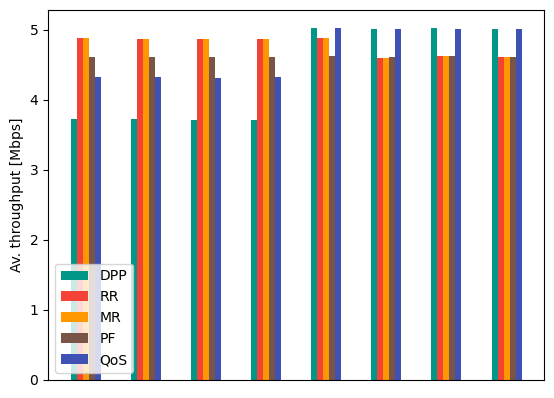

In [6]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os

# Run schedulers
num_sim = 1 # Number of simulations
for n in range(1,num_sim+1):
        if not os.path.isfile("sim_thput/resDPP_n{n}.txt"):
                cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr-qos-sched -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType=DPP > /dev/null 2>&1"
                os.system(cmd)
                cmd = f"mv res.txt sim_thput/resDPP_V0.00e+00_n{n}.txt"
                os.system(cmd)

for s in ['RR', 'MR', 'PF', 'Qos']:
        for n in range(1,num_sim+1):
                if not os.path.isfile(f"sim_thput/res{s}_n{n}.txt"):
                        cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr-qos-sched -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType={s} > /dev/null 2>&1"
                        os.system(cmd)
                        cmd = f"mv res.txt sim_thput/res{s}_n{n}.txt"
                        os.system(cmd)

# Read data
dpp = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resDPP_V0.00e+00_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != "Thput":
                                thput.append(float(row[0]))
        dpp.append(thput)
dpp = np.array(dpp).mean(0)

rr = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resRR_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        rr.append(thput)
rr = np.array(rr).mean(0)

mr = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resMR_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        mr.append(thput)
mr = np.array(mr).mean(0)

pf = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resPF_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        pf.append(thput)
pf = np.array(pf).mean(0)

qos = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resQos_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        qos.append(thput)
qos = np.array(qos).mean(0)

# Plot
plt.figure()
x = np.arange(len(thput))
plt.bar(x-0.2, dpp, 0.1, label='DPP', color='#009688')
plt.bar(x-0.1, rr, 0.1, label='RR', color='#f44336')
plt.bar(x, mr, 0.1, label='MR', color='#ff9800')
plt.bar(x+0.1, pf, 0.1, label='PF', color='#795548')
plt.bar(x+0.2, qos, 0.1, label='QoS', color='#3f51b5')
plt.ylabel("Av. throughput [Mbps]")
plt.xticks([])
plt.legend(loc='lower left')

([], [])

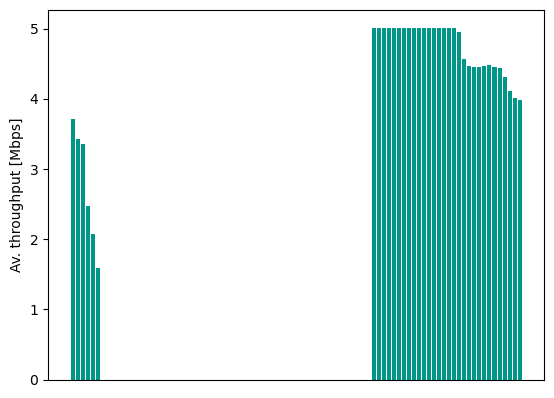

In [7]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

# Read data
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

num_sim = 1 # Number of simulations
avgLow,avgHigh = [],[]
for v in vv:
        avgLow_aux,avgHigh_aux = [],[]
        for n in range(1,num_sim+1):
                fn = f"sim_thput/resDPP_V{v:.2e}_n{n}.txt"
                df = pd.read_csv(fn, delimiter= '\t')
                avgLow_aux.append(df.head(4)['Thput'].mean())
                avgHigh_aux.append(df.tail(4)['Thput'].mean())
        avgLow.append(np.array(avgLow_aux).mean())
        avgHigh.append(np.array(avgHigh_aux).mean())

# Plot
plt.figure()
x = np.arange(len(avgLow))
plt.bar(x,avgLow, color='#009688')
plt.bar(x+2*len(avgLow),avgHigh, color='#009688')
plt.ylabel("Av. throughput [Mbps]")
plt.xticks([])

([], [])

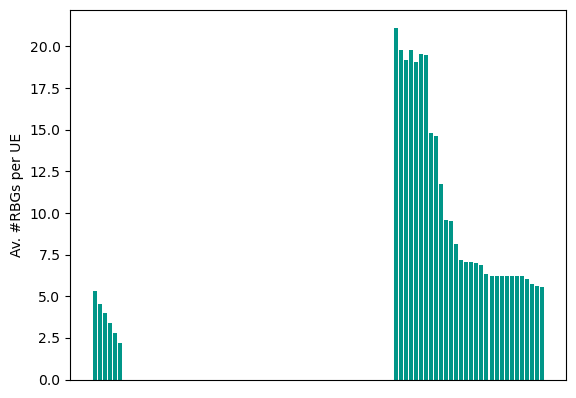

In [8]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

# Read data
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

num_sim = 1 # Number of simulations
avgLow,avgHigh = [],[]
for v in vv:
        avgLow_aux,avgHigh_aux = [],[]
        for n in range(1,num_sim+1):
                fn = f"sim_alpha/alphaDPP_V{v:.2e}_n{n}.txt"
                df = pd.read_csv(fn, delimiter= '\t')
                avgLow_aux.append(df[df['UE'] > 4]['resources'].mean())
                avgHigh_aux.append(df[df['UE'] <= 4]['resources'].mean())
        avgLow.append(np.array(avgLow_aux).mean())
        avgHigh.append(np.array(avgHigh_aux).mean())

# Plot
plt.figure()
x = np.arange(len(avgLow))
plt.bar(x,avgLow, color='#009688')
plt.bar(x+2*len(avgLow),avgHigh, color='#009688')
plt.ylabel("Av. #RBGs per UE")
plt.xticks([])